In [9]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fname='bad6.csv'
colfilter = ['Process','Period','PV']

In [10]:
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)
procs = a.Process.unique()
newyrs=pd.Series(range(2013,2101))
pltdict={}

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#a.to_csv('df_test.csv', sep='\t')

In [11]:
print(procs)

['ELCCC17' 'ELCPVN17' 'ELCTECOA' 'ELCTEGEO' 'ELCTEHYD' 'ELCTELNG'
 'ELCTENUC' 'ELCTEOIL' 'ELCTEPVS' 'ELCTEWND' 'ELCWON17' 'FTE-ELCSTG17'
 'LNGCCS22' 'PEMFC22' 'USCCCS23']


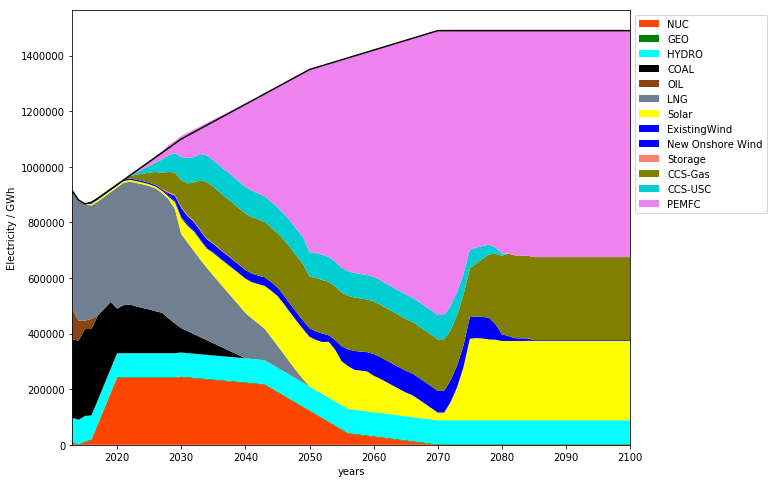

In [14]:
ordlegend=['NUC','GEO','HYDRO',
           'COAL','OIL', 'LNG',
           'Solar', 'ExistingWind' ,'New Onshore Wind','Storage',
          'CCS-Gas','CCS-USC','PEMFC']
colours = ['orangered', 'green', 'aqua',
            'black', 'saddlebrown', 'slategray',
           'yellow','blue','blue','salmon',
           'olive','darkturquoise','violet']
f, ax = plt.subplots(figsize=(10, 8))
pltyrs=range(2013,2101)
ax.stackplot(pltyrs, pltdict['ELCTENUC'],pltdict['ELCTEGEO'], pltdict['ELCTEHYD'],
             pltdict['ELCTECOA'],pltdict['ELCTEOIL'], pltdict['ELCTELNG']+pltdict['ELCCC17'],
              pltdict['ELCTEPVS']+pltdict['ELCPVN17'], pltdict['ELCTEWND'],pltdict['ELCWON17'],pltdict['FTE-ELCSTG17'],
              pltdict['LNGCCS22'],pltdict['USCCCS23'],pltdict['PEMFC22'], labels=ordlegend, colors=colours)
dmd=[913791,880396,866861,872251,8.87E+05,1.10E+06,1.35E+06,1.49E+06,1.49E+06]
yr=[2013,2014,2015,2016,2017,2030,2050,2070,2100]
ax.plot(yr,dmd,color='black')
ax.set_xlim((2013, 2100))
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_xlabel('years')
ax.set_ylabel('Electricity / GWh')
f.savefig('bad6.jpg',bbox_inches='tight', dpi=300)